# Testing `plotdigitizer`

Launches from https://github.com/fomightez/plotdigitizer-binder should result in sessions where `plotdigitizer` is already installed.  
This notebook is meant to test that and to test the examples work as expected. **You should only be interested in this notebook if troubleshooting.**

----------

Technical details on originally getting this to work in sessions served via MyBinder.org:

Based on https://github.com/fomightez/gel_image_annotation because when first tried running in a vanilla Jupyter session I got error about and when I searched that it came to [this stackoverflow post](https://stackoverflow.com/q/55313610/8508004) about getting `opencv` to work and sure enough [when I seached for 'opencv' in the PlotDigitizer code](https://github.com/search?q=repo%3Adilawar%2FPlotDigitizer%20opencv&type=code), I noted it had it listed as a dependency in [pyproject.toml](https://github.com/dilawar/PlotDigitizer/blob/565b89911d92ac5bcbffe4aa1ec60232369446df/pyproject.toml#L13) & [poetry.lock](https://github.com/dilawar/PlotDigitizer/blob/565b89911d92ac5bcbffe4aa1ec60232369446df/poetry.lock#L207) and [trajectory.py in it spoke of using opencv pixel assignment values](https://github.com/dilawar/PlotDigitizer/blob/565b89911d92ac5bcbffe4aa1ec60232369446df/plotdigitizer/trajectory.py#L37). (Plus I stumbled upon this issue, [No module name cv2](https://github.com/dilawar/PlotDigitizer/issues/8) where the developer states, "You need to install opencv python module.") I know I had opencv working in the past in https://github.com/fomightez/gel_image_annotation , which actually was also about scanning image files and converting trends in them to data accessible in Python & so it makes sense, and so started with variations on the configuration files in there as a basis. (In fact, I was able to launch a session from https://github.com/fomightez/gel_image_annotation , install `PlotDigitizer` with `pip` and get the command `!plotdigitizer --help` to work and show usage, and thus I knew it was a good path forward.)

------------

## Verifying it is installed in this environment

Running this next cell should show the usage for `plotdigitizer` if the environment was built correctly to run it.

In [1]:
!plotdigitizer --help

usage: plotdigitizer [-h] --data-point DATA_POINT [--location LOCATION]
                     [--plot PLOT] [--output OUTPUT] [--preprocess] [--debug]
                     INPUT

Digitize image.

positional arguments:
  INPUT                 Input image file.

optional arguments:
  -h, --help            show this help message and exit
  --data-point DATA_POINT, -p DATA_POINT
                        Datapoints (min 3 required). You have to click on them
                        later. At least 3 points are recommended. e.g -p 0,0
                        -p 10,0 -p 0,1 Make sure that point are comma
                        separated without any space.
  --location LOCATION, -l LOCATION
                        Location of a points on figure in pixels (integer).
                        These values should appear in the same order as -p
                        option. If not given, you will be asked to click on
                        the figure.
  --plot PLOT           Plot the final result.

-----

## Trying the `plotdigitizer` examples in the documentation

Now that it is verified to be installed, let's try the examples in the documentation to make sure it is working as expected since sometimes changes in the package or dependencies can cause an issue.

Because theses tests aren't normally needed, we'll need to do some preparation first.

The next cell will get the repository that contains the example files and change to that directory to run commands.

In [2]:
!git clone https://github.com/dilawar/PlotDigitizer.git
%cd PlotDigitizer

Cloning into 'PlotDigitizer'...
remote: Enumerating objects: 543, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 543 (delta 66), reused 80 (delta 54), pack-reused 428
Receiving objects: 100% (543/543), 1.74 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (292/292), done.


So we should have images now to work with that correspond to those in the README and utilized in `tests`.

Example Input Plot image:

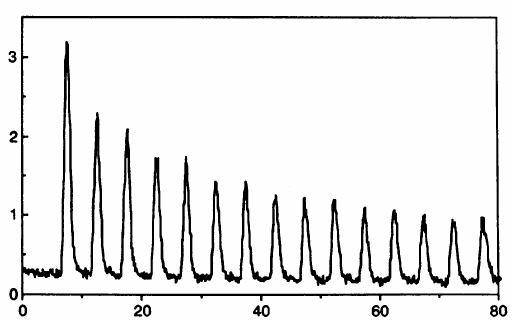

In [26]:
from IPython.display import Image
Image("figures/trimmed.png")

The next cell will run the equivalent to the main first example on the main README using the above as input.  
(Note the coordinates used come from [here](https://github.com/dilawar/PlotDigitizer/blob/565b89911d92ac5bcbffe4aa1ec60232369446df/tests/test_cli.py#L34) as the ones in the command found in the current version of the README aren't correct which I only ascertained after getting an error of out range values, `f"{pixel} is outside the range"` that lead to me reading [here in this issue](https://github.com/dilawar/PlotDigitizer/issues/1#issuecomment-536993259). It seems since that response was written the test in the makfile was moved to an expanded set of tests in the `tests` directory.)

In [9]:
!plotdigitizer ./figures/trimmed.png -p 0,0 -p 20,0 -p 0,1 -l 22,26 -l 142,23 -l 23,106 --plot output.png

Let's view the image produced, by running the next cell, to verify it worked:

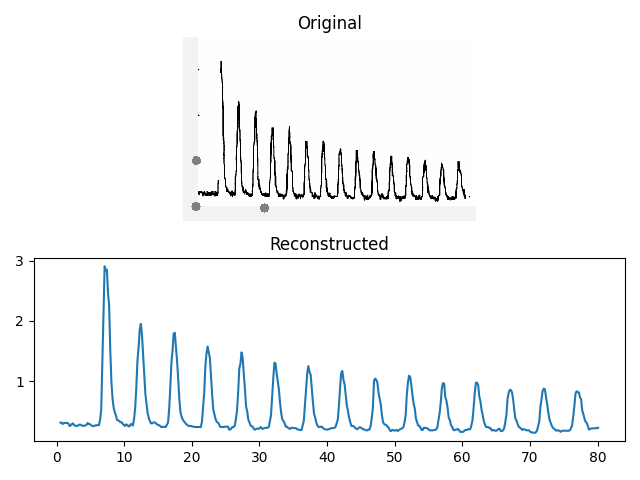

In [3]:
from IPython.display import Image
Image("output.png")

It should look something like [as displayed in the source repository](https://raw.githubusercontent.com/dilawar/PlotDigitizer/master/figures/trimmed.result.png).

-----

### Additional Examples from [under Examples](https://github.com/dilawar/PlotDigitizer#examples)

So far these seem to be written in README, not matching what is found in `tests`. What is found in `tests` works and so equivalent commands edited to work here. The output was also generated in a different location then in the Examples in the README for making clear what is new.

### Base example

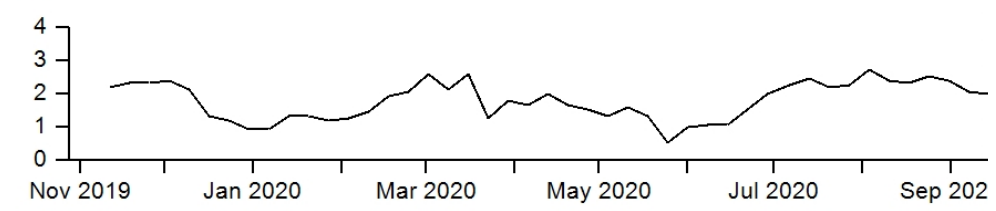

In [24]:
from IPython.display import Image, display, HTML
display(HTML('<b>INPUT for `Base example`:</b>'))
Image("figures/graphs_1.png")

In [6]:
!plotdigitizer ./figures/graphs_1.png \
		-p 1,0 -p 6,0 -p 0,3 \
		-l 165,52 -l 599,51 -l 85,151 \
		--plot graphs_1.result.png \
		--preprocess

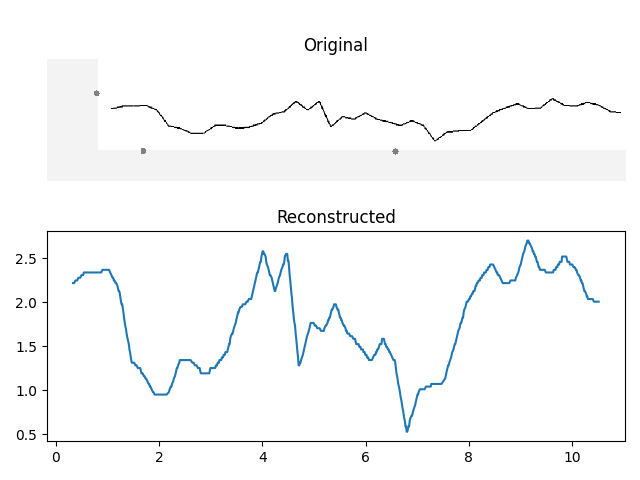

In [7]:
from IPython.display import Image, display, HTML
display(HTML('<b>RESULT for `Base example`:</b>'))
Image("graphs_1.result.png")

### Light grids

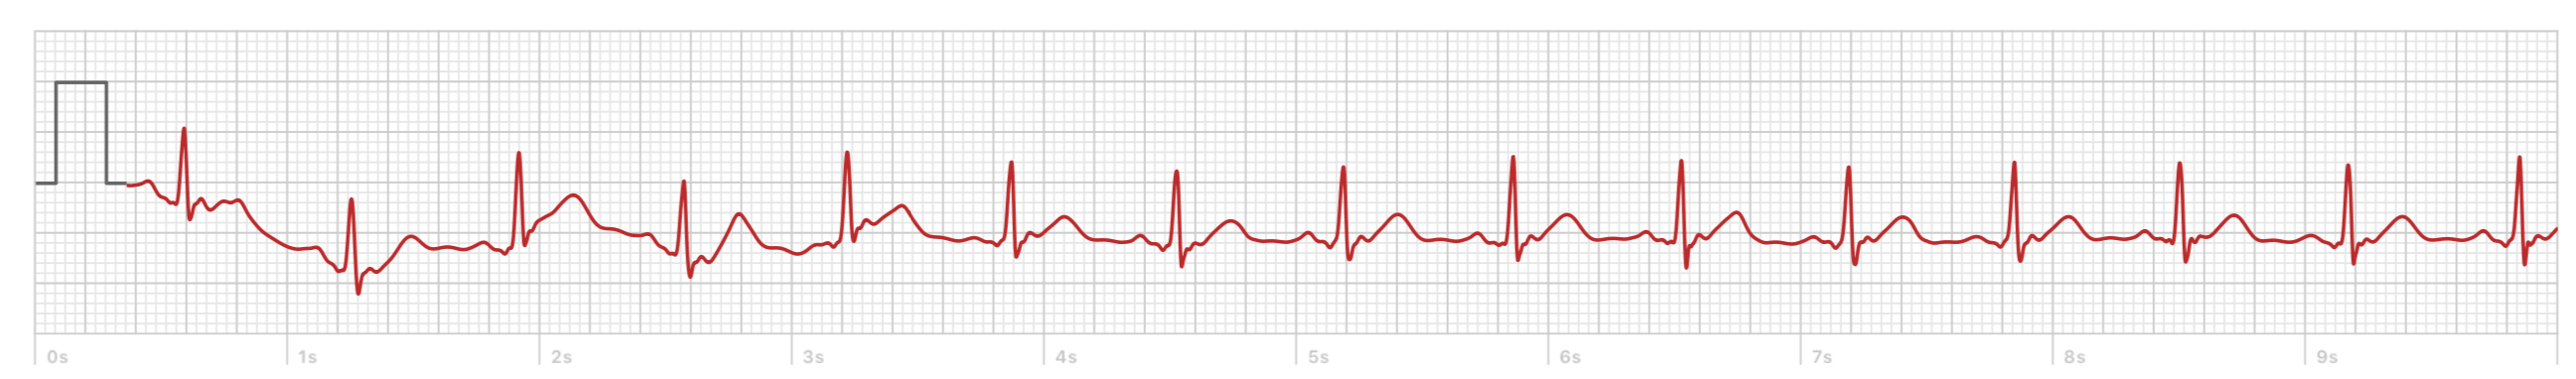

In [23]:
from IPython.display import Image, display, HTML
display(HTML('<b>INPUT for `Light grids` example:</b>'))
Image("figures/ECGImage.png")

In [11]:
!plotdigitizer figures/ECGImage.png \
		-p 1,0 -p 5,0 -p 0,1 \
        -l 290,44 -l 1306,43 -l 106,301 \
		--plot fECGImage.result.png

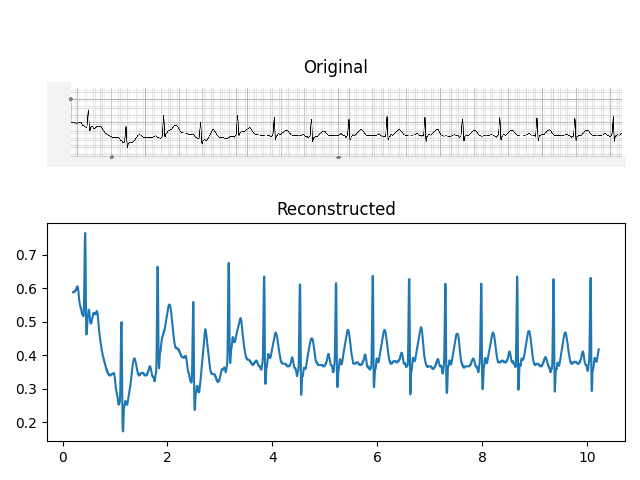

In [12]:
from IPython.display import Image, display, HTML
display(HTML('<b>RESULT for `Light grids` example:</b>'))
Image("fECGImage.result.png")

### With grids

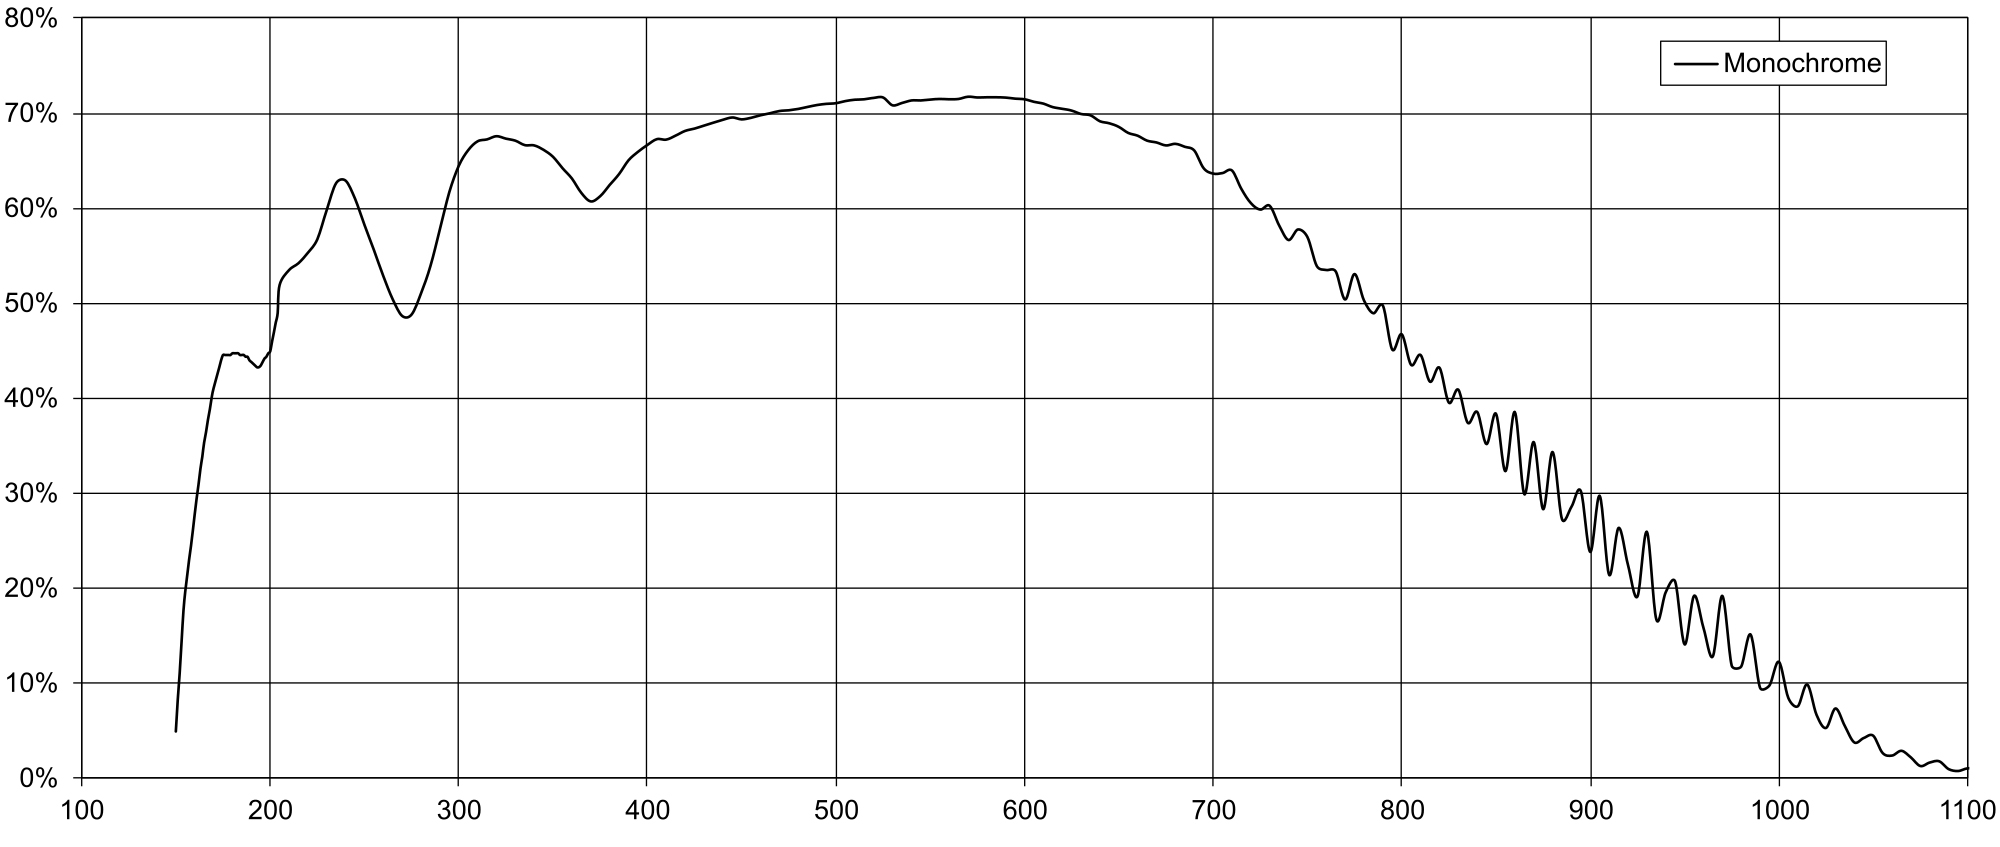

In [20]:
from IPython.display import Image, display, HTML
display(HTML('<b>INPUT for `With grids` example:</b>'))
Image("figures/graph_with_grid.png")

In [13]:
!plotdigitizer  figures/graph_with_grid.png \
		-p 200,0 -p 1000,0 -p 0,50 \
        -l 269,69 -l 1789,69 -l 82,542 \
		--plot graph_with_grid.result.png

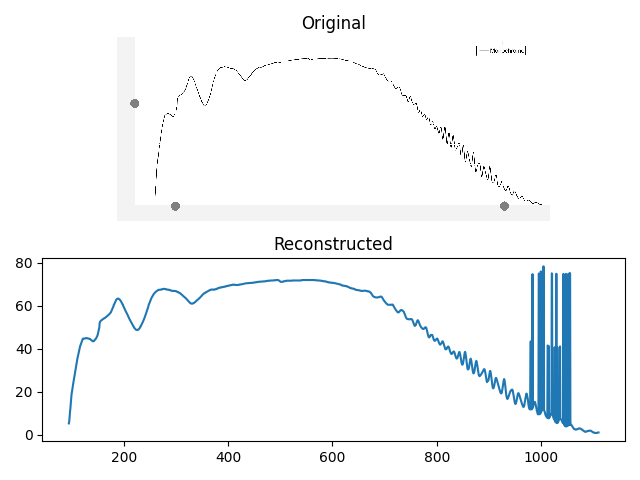

In [21]:
from IPython.display import Image, display, HTML
display(HTML('<b>RESULT for `With grids` example:</b>'))
Image("graph_with_grid.result.png")